In [37]:
#### Basic 

import os
import shutil
import random
import re
import math
import time
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

# Scikit-learn

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

# Deep Learning

from tqdm import tqdm
from tqdm.keras import TqdmCallback
import tensorflow as tf, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
import efficientnet.tfkeras as efn
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam

# Visualization

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.tools import FigureFactory as FF
from plotly.offline import iplot
import seaborn as sns
%matplotlib inline

# Misc

import streamlit as st
from PIL import Image
import cufflinks
import cv2
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Setting file paths for our notebook:

base_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg'

train_img_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_class'
train_images = [f for f in listdir(train_img_path) if isfile(join(train_img_path, f))]

test_img_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test'
test_images = [f for f in listdir(test_img_path) if isfile(join(test_img_path, f))]

img_stats_path = r'C:\Users\HIMANSHU\Downloads\Melanoma Dataset'

In [39]:
# Loading train and test data.

src = r'C:\Users\HIMANSHU\OneDrive\Desktop\Juypter\Melanoma Classification'

train = pd.read_csv(os.path.join(base_path, 'train.csv'))
test = pd.read_csv(os.path.join(base_path, 'test.csv'))
sample = pd.read_csv(os.path.join(base_path, 'sample_submission.csv'))

benign = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_class\benign'
benign_images = [f for f in listdir(benign) if isfile(join(benign, f))]

malignant = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_class\malignant'
malignant_images = [f for f in listdir(malignant) if isfile(join(malignant, f))]

In [40]:
import pathlib
# Setting file paths for our notebook:

data_dir = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_class'
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

33126


In [41]:
len(benign_images)

32542

In [42]:
len(malignant_images)

584

In [43]:
# Image Sharpening

for i in range(len(malignant_images)):
    image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train' + '\\' + malignant_images[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create our shapening kernel, we don't normalize since the 
    # the values in the matrix sum to 1
    kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

    # applying different kernels to the input image
    sharpened = cv2.filter2D(image, -1, kernel_sharpening)
    
#     cv2.imwrite('normal_'+malignant_images[i],image)
    cv2.imwrite('sharpening_'+malignant_images[i],image)
    
#     shutil.move(src+'\\'+'normal_'+malignant_images[i], malignant+'\\'+'normal_'+malignant_images[i])  
    shutil.move(src+'\\'+'sharpening_'+malignant_images[i], malignant+'\\'+'sharpening_'+malignant_images[i])  

In [54]:
# Image Thresholding

for i in range(len(malignant_images)):
    image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train' + '\\' + malignant_images[i], 0)

    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(image, (5,5), 0)
    _, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
#     cv2.imwrite('image_'+malignant_images[i],image)
    cv2.imwrite('otsu_'+malignant_images[i],th3)
    
#     shutil.move(src+'\\'+'image_'+malignant_images[i], malignant+'\\'+'image_'+malignant_images[i])  
    shutil.move(src+'\\'+'otsu_'+malignant_images[i], malignant+'\\'+'otsu_'+malignant_images[i])  

In [53]:
# Image Dilation

for i in range(len(malignant_images)):
    image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train' + '\\' + malignant_images[i], 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Let's define our kernel size
    kernel = np.ones((5,5), np.uint8)
    
    # 
    dilation = cv2.dilate(image, kernel, iterations = 1)
    
    cv2.imwrite('dilation_'+malignant_images[i],dilation)

    shutil.move(src+'\\'+'dilation_'+malignant_images[i], malignant+'\\'+'dilation_'+malignant_images[i])  

In [55]:
# Image Edge Detection

for i in range(len(malignant_images)):
    image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train' + '\\' + malignant_images[i], 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width,_ = image.shape
    
    # Extract Sobel Edges
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    
    sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
    
    # Canny Edge Detection uses gradient values as thresholds
    # The first threshold gradient
    canny = cv2.Canny(image, 50, 120)
    
    cv2.imwrite('sobel_OR_'+malignant_images[i],sobel_OR)
    cv2.imwrite('canny_'+malignant_images[i],canny)

    shutil.move(src+'\\'+'sobel_OR_'+malignant_images[i], malignant+'\\'+'sobel_OR_'+malignant_images[i])  
    shutil.move(src+'\\'+'canny_'+malignant_images[i], malignant+'\\'+'canny_'+malignant_images[i])  

In [56]:
# Image Scaling, resizing

for i in range(len(malignant_images)):
    image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train' + '\\' + malignant_images[i], 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Let's make our image 3/4 of it's original size
    img_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
    
    # Let's double the size of our image
    img_double = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    
    # Let's skew the re-sizing by setting exact dimensions
    img_skew = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
    
    cv2.imwrite('img_scaled_'+malignant_images[i], img_scaled)
    cv2.imwrite('img_double_'+malignant_images[i], img_double)
    cv2.imwrite('img_skew_'+malignant_images[i], img_skew)

    shutil.move(src+'\\'+'img_scaled_'+malignant_images[i], malignant+'\\'+'img_scaled_'+malignant_images[i])  
    shutil.move(src+'\\'+'img_double_'+malignant_images[i], malignant+'\\'+'img_double_'+malignant_images[i]) 
    shutil.move(src+'\\'+'img_skew_'+malignant_images[i], malignant+'\\'+'img_skew_'+malignant_images[i])  

In [57]:
# Image Crop

for i in range(len(malignant_images)):
    image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train' + '\\' + malignant_images[i], 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    height, width = image.shape[:2]

    # Let's get the starting pixel coordiantes (top  left of cropping rectangle)
    start_row, start_col = int(height * .25), int(width * .25)

    # Let's get the ending pixel coordinates (bottom right)
    end_row, end_col = int(height * .75), int(width * .75)

    # Simply use indexing to crop out the rectangle we desire
    cropped = image[start_row:end_row , start_col:end_col]
    
    cv2.imwrite('crop_'+malignant_images[i],cropped)

    shutil.move(src+'\\'+'crop_'+malignant_images[i], malignant+'\\'+'crop_'+malignant_images[i])  

In [58]:
# Image Blurring

for i in range(len(malignant_images)):
    image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train' + '\\' + malignant_images[i], 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Creating our 7 x 7 kernel
    kernel_7x7 = np.ones((7, 7), np.float32) / 49
    blurred = cv2.filter2D(image, -1, kernel_7x7)
    
    cv2.imwrite('blurred_'+malignant_images[i],blurred)

    shutil.move(src+'\\'+'blurred_'+malignant_images[i], malignant+'\\'+'blurred_'+malignant_images[i])  

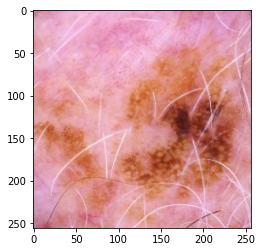

In [35]:
image = cv2.imread(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0082934.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [29]:
src+'\\'+'normal_'+malignant_images[0]

'C:\\Users\\HIMANSHU\\OneDrive\\Desktop\\Juypter\\Melanoma Classification\\normal_ISIC_0149698.jpg'

In [20]:
print(r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train' + '\\' + malignant_images[0])

C:\Users\HIMANSHU\Downloads\Melanoma jpg\train\ISIC_0149698.jpg


In [ ]:
shutil.move(src+'\\'+train_images[i], benign+'\\'+train_images[i])  

In [14]:
#Import all libraries we will use
import random
import numpy as np
import cv2

#let's create a 6 x 6 matrix with all pixels in black color
img = np.zeros((6,6,3),np.uint8)

#let's use "for" cycle to change colorspace of pixel in a random way
for x in range(6):
    for y in range(6):
        #We use "0" for black color (do nothing) and "1" for white color (change pixel value to [255,255,255])
        value = random.randint(0,1)
        if value == 1:
            img[x,y] = [255,255,255]

#save our image as a "png" image
cv2.imwrite("6_x_6.png",img)

True

In [ ]:
for i in range(train.shape[0]):
    if train['target'].iloc[i] == 0:
        shutil.move(src+'\\'+train_images[i], benign+'\\'+train_images[i])  
    else:
        shutil.move(src+'\\'+train_images[i], malignant+'\\'+train_images[i]) 